In [54]:
#open files and specify column names

import os
import pandas as pd

column_names = ["Sample", "Chromosome", "Position", "Ref Allele", "Alt Allele", "Allele Frequency", "Number Reads", "Total Reads"]
filenames = []
samplenames = []
df_list = []
for file in os.listdir("/Users/johnnavarro/AS_variants_list"):
    if file.endswith("_withreadsfiltered.txt"):
        filenames.append(file)
for f in sorted(filenames):
    specific_names = []
    #these names do not have the name of strains
    for val in column_names[0:4]:
        specific_names.append(val)
    #these names have the name of the strain 
    for val in column_names[4:]:
        val = val + "_" + f.split("_")[0]
        specific_names.append(val)
    #append each dataframe to a list
    df_list.append(pd.read_csv(f,sep="\t",header=None,names=specific_names).drop([specific_names[-1],specific_names[-2]],axis=1))


In [55]:
#starting dataframe prior to merge
dfs2 = df_list[0].drop(["Sample"],axis=1)
sortednames = sorted(filenames)
#merge each dataframe to form combined dataframe
for df in df_list[1:]:
    dfs2 = pd.merge(dfs2,df.drop("Sample",axis=1),on=["Chromosome","Position","Ref Allele"], how="outer")
dfs3 = dfs2.loc[:,dfs2.columns.str.startswith("Allele Frequency")]





In [56]:
#removes positions that have all frequencies > 0.95
dfsstuff = dfs2[dfs2.loc[:,dfs2.columns.str.startswith("Allele Frequency")].min(axis=1) < 0.95]
#keep positions that fluctuate in frequency in different strains
dfsstuff2 = dfsstuff[dfsstuff.loc[:,dfsstuff.columns.str.startswith("Allele Frequency")].min(axis=1) < 0.50]
dfsstuff3 = dfsstuff2[dfsstuff2.loc[:,dfsstuff2.columns.str.startswith("Allele Frequency")].max(axis=1) > 0.50]
dfsstuff4 = dfsstuff3.set_index("Position")
#output to txt file 
dfsstuff4.to_csv("as_merged.txt",sep="\t")
display(dfsstuff4)


,Chromosome,Ref Allele,Alt Allele_AS218,Allele Frequency_AS218,Alt Allele_AS219,Allele Frequency_AS219,Alt Allele_AS222,Allele Frequency_AS222,Alt Allele_AS223,Allele Frequency_AS223,...,Alt Allele_AS232,Allele Frequency_AS232,Alt Allele_AS233,Allele Frequency_AS233,Alt Allele_AS236,Allele Frequency_AS236,Alt Allele_AS237,Allele Frequency_AS237,Alt Allele_AS240,Allele Frequency_AS240
Position,,,,,,,,,,,,,,,,,,,,,
31544,NZ_CP020397.1,T,C,1.000000,C,0.913690,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49109,NZ_CP020397.1,A,T,0.118644,T,0.095406,T,0.134804,T,0.103672,...,T,0.113565,T,0.127036,T,0.104089,T,0.106452,T,1.0
49136,NZ_CP020397.1,C,T,0.135714,T,0.145390,T,0.167476,T,0.139640,...,T,0.168168,T,0.146789,T,0.155102,T,0.130699,T,1.0
49140,NZ_CP020397.1,T,C,0.135514,C,0.144876,C,0.171569,C,0.138702,...,C,0.164671,C,0.148148,C,0.145161,C,0.131661,C,1.0
49152,NZ_CP020397.1,G,C,0.119048,C,0.140152,C,0.154242,C,0.130233,...,C,0.159021,C,0.134868,C,0.138462,C,0.121311,C,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608054,NZ_CP020397.1,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194017,NZ_CP020398.1,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909756,NZ_CP020397.1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,G,0.333333,NaN,NaN,G,0.500000,NaN,NaN,NaN,NaN


0.42905117411398846
0.3565596868599761


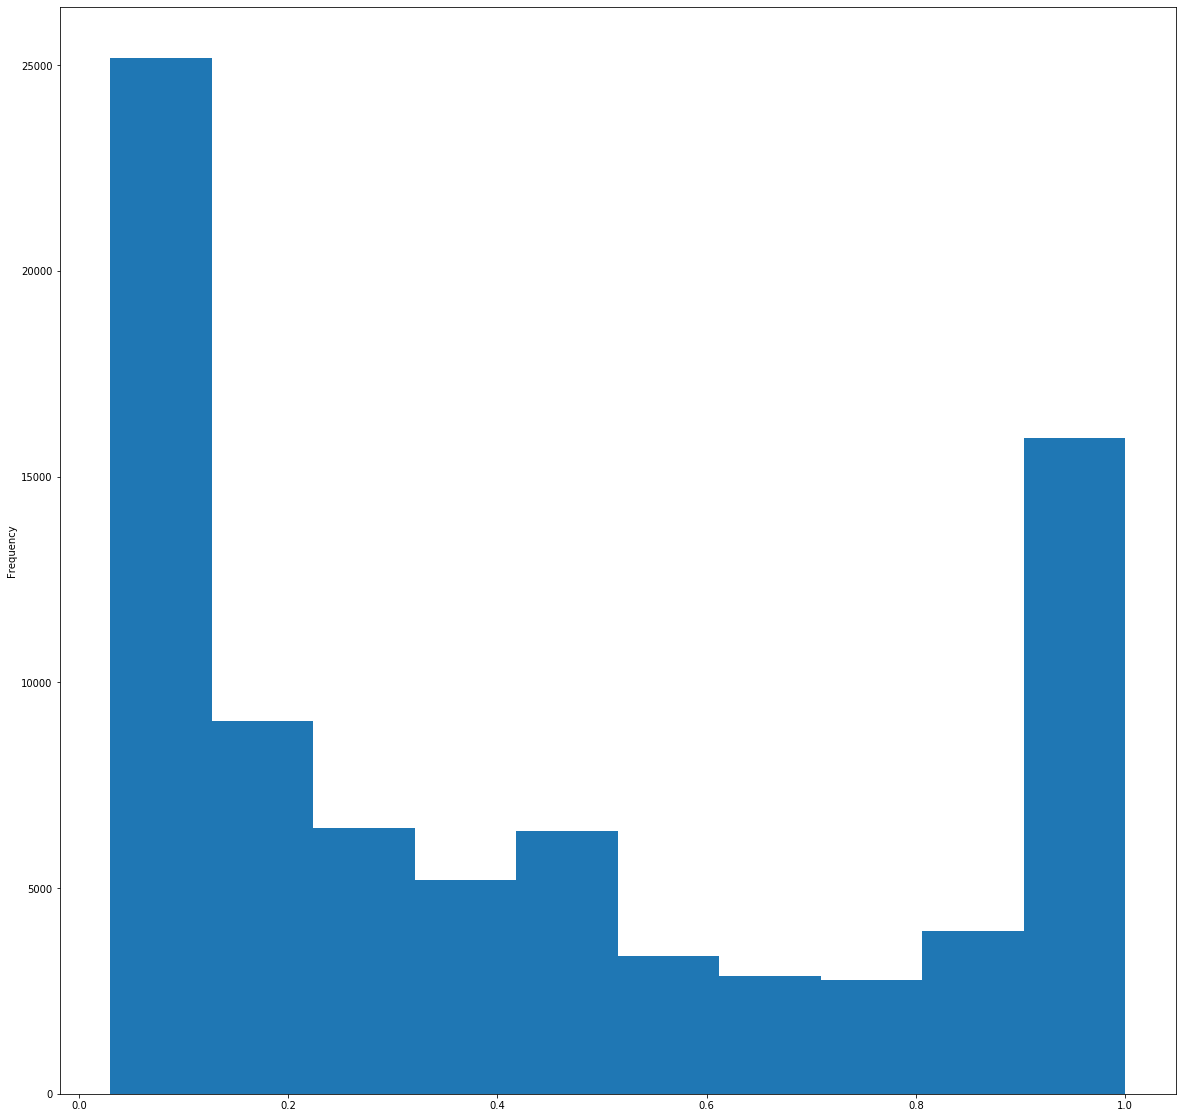

In [57]:
#mean, sd and distribution of frequencies
dfs_min = dfs3[dfs3.min(axis=1) < 0.95]
dfs_mean = dfs_min.stack().mean()
dfs_sd = dfs_min.stack().std()
print(dfs_mean)
print(dfs_sd)
dfshist = dfs_min.stack().plot(kind="hist",figsize=(20,20))
display(dfshist)